In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
import pandas as pd
import csv
from sklearn.cluster import KMeans

data = pd.read_csv('/content/drive/MyDrive/MachineLearning/fakeUsers.csv',index_col="id")

print(data.dtypes)
data2 = data[0:10000]

data2

prenom               object
nom                  object
age                   int64
ville                object
Clubbing              int64
Atelier               int64
Humour                int64
Concert               int64
Musique               int64
Danse                 int64
Théâtre               int64
Conférence            int64
Enfants               int64
Sport                 int64
Cinéma                int64
Loisirs               int64
Littérature           int64
Spectacle musical     int64
Balade                int64
Histoire              int64
Nature                int64
Art contemporain      int64
Expo                  int64
LGBT                  int64
Peinture              int64
Photo                 int64
Innovation            int64
Cirque                int64
BD                    int64
Sciences              int64
Solidarité            int64
Salon                 int64
Street-art            int64
Gourmand              int64
dtype: object


,prenom,nom,age,ville,Clubbing,Atelier,Humour,Concert,Musique,Danse,Théâtre,Conférence,Enfants,Sport,Cinéma,Loisirs,Littérature,Spectacle musical,Balade,Histoire,Nature,Art contemporain,Expo,LGBT,Peinture,Photo,Innovation,Cirque,BD,Sciences,Solidarité,Salon,Street-art,Gourmand
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Melissa,Sturkie,44,NANTERRE,0,1,2,4,1,1,0,4,3,2,3,2,0,0,2,2,5,1,4,1,2,2,0,1,1,2,1,2,1,0
1,Irene,Blight,20,NOGENT SUR MARNE,3,0,3,3,5,2,1,3,0,1,3,1,0,0,1,1,0,0,1,2,0,3,0,4,2,4,1,3,3,0
2,James,Irvin,25,SCEAUX,3,2,3,6,1,0,1,0,0,1,1,2,0,0,2,0,2,0,3,4,2,1,1,2,3,1,1,3,5,0
3,Jonathan,Haney,41,SUCY EN BRIE,0,3,1,1,1,1,2,1,2,4,3,2,2,2,2,3,2,1,2,0,2,3,2,2,1,1,3,1,0,0
4,Margaret,Gentry,38,AUBERVILLIERS,2,0,4,2,4,0,3,3,3,1,1,1,3,5,0,0,1,0,0,0,3,3,3,0,0,1,3,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Richard,Huland,33,AULNAY SOUS BOIS,2,1,5,1,0,2,1,3,1,1,2,5,1,1,2,3,2,3,0,0,2,2,5,2,0,0,1,2,0,0
9996,Billie,Wiley,59,LE BLANC MESNIL,0,4,4,1,2,0,1,1,5,3,0,2,5,0,1,2,1,3,0,0,3,5,0,1,0,1,2,2,1,0
9997,Thomas,Norris,43,PARIS 06,1,3,1,3,2,1,2,1,2,2,2,1,3,4,0,2,1,2,1,0,5,2,1,2,0,1,3,2,0,0


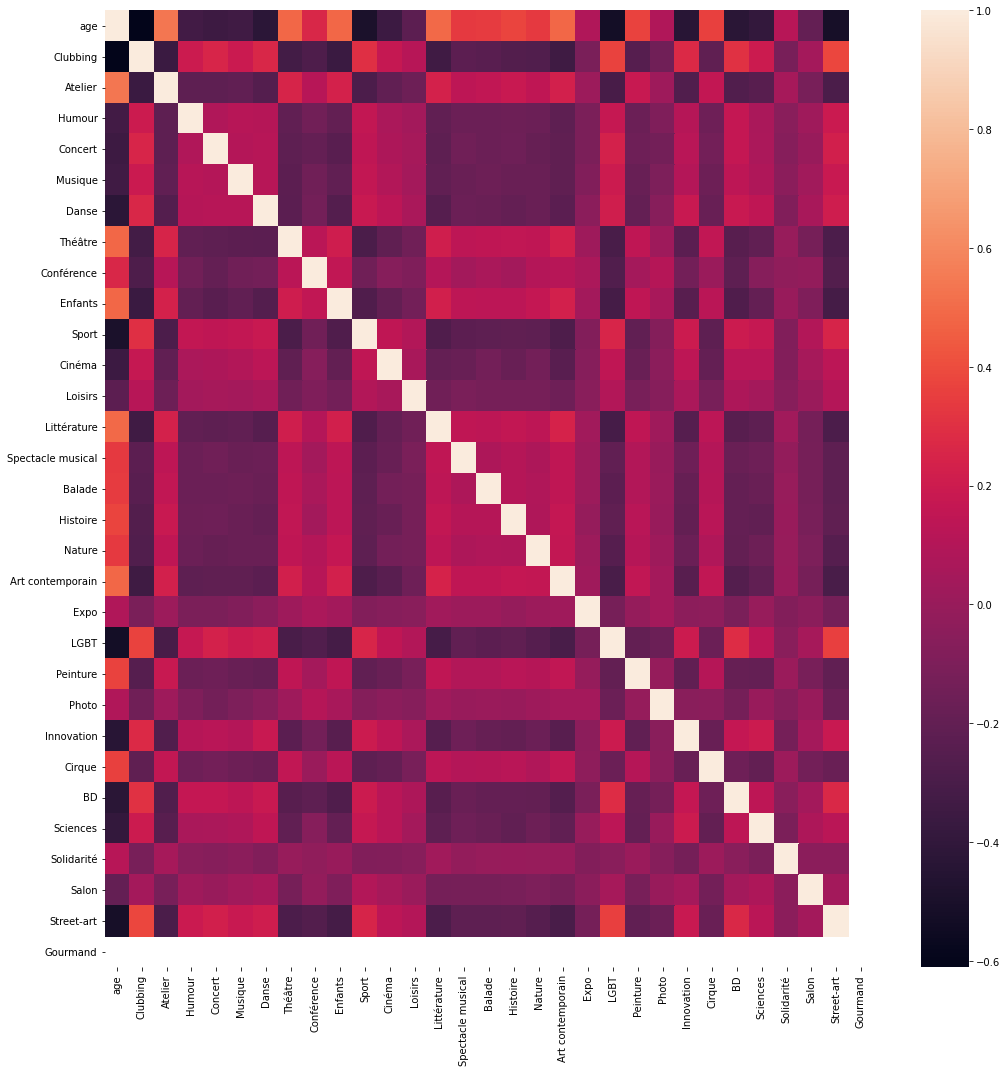

In [22]:
#Matrice de corrélation
import matplotlib.pyplot as plt
import seaborn as sns

corr_df = data2.corr(method='pearson')

plt.figure(figsize=(15, 15))
sns.heatmap(corr_df, annot=False)
plt.show()

In [23]:
#transformation en matrice numpy seul reconnu par scikit learn
#data = pima.to_numpy()
from sklearn import preprocessing

Encoder2 = preprocessing.LabelEncoder()

#binarisation des champs booléen yes/no avec Encoder2
data2["prenom"]=Encoder2.fit_transform(data2["prenom"])
data2["nom"]=Encoder2.fit_transform(data2["nom"])
data2["ville"]=Encoder2.fit_transform(data2["ville"])

data2 = data2.drop(columns="nom")
data2 = data2.drop(columns="prenom")
data2 = data2.drop(columns="ville")

data2.dtypes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

age                  int64
Clubbing             int64
Atelier              int64
Humour               int64
Concert              int64
Musique              int64
Danse                int64
Théâtre              int64
Conférence           int64
Enfants              int64
Sport                int64
Cinéma               int64
Loisirs              int64
Littérature          int64
Spectacle musical    int64
Balade               int64
Histoire             int64
Nature               int64
Art contemporain     int64
Expo                 int64
LGBT                 int64
Peinture             int64
Photo                int64
Innovation           int64
Cirque               int64
BD                   int64
Sciences             int64
Solidarité           int64
Salon                int64
Street-art           int64
Gourmand             int64
dtype: object

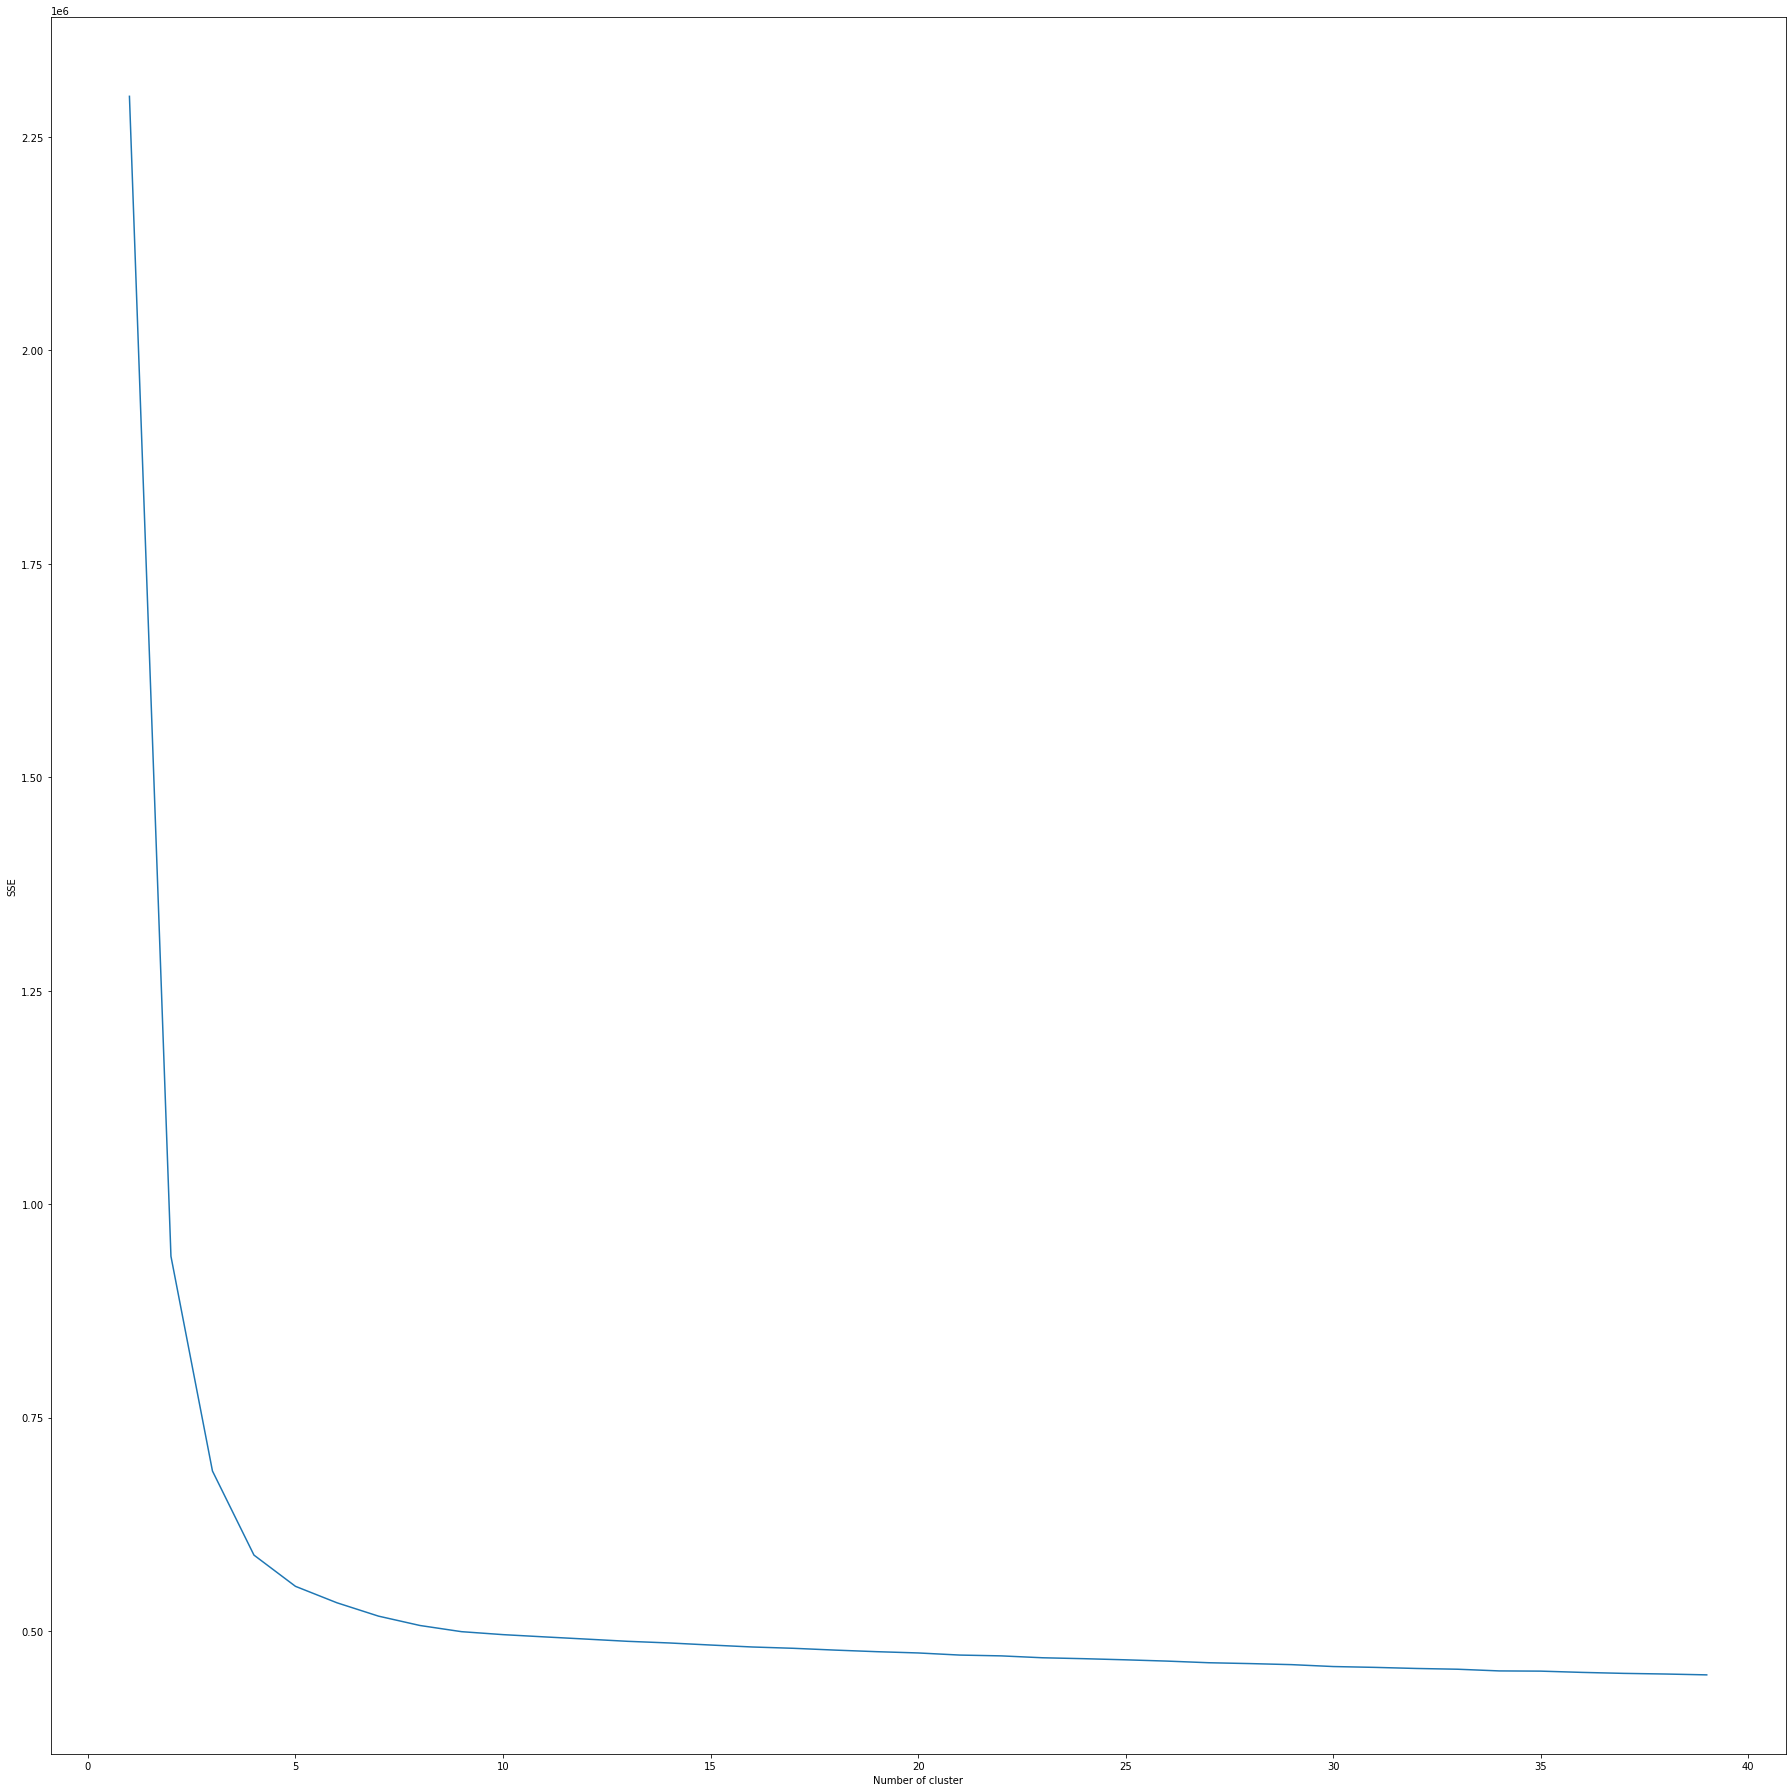

In [25]:

##Fonction elbow permet de trouver le meilleur k pour le clustering

# Continuing after vectorization step
# data-structure to store Sum-Of-Square-Errors
sse = {}
# Looping over multiple values of k from 1 to 30
for k in range(1, 40):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=100).fit(data2)
    labelsKM = kmeans.labels_
    sse[k] = kmeans.inertia_
# Plotting the curve with 'k'-value vs SSE
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
# Save the Plot in current directory
plt.savefig('elbow_method.png')

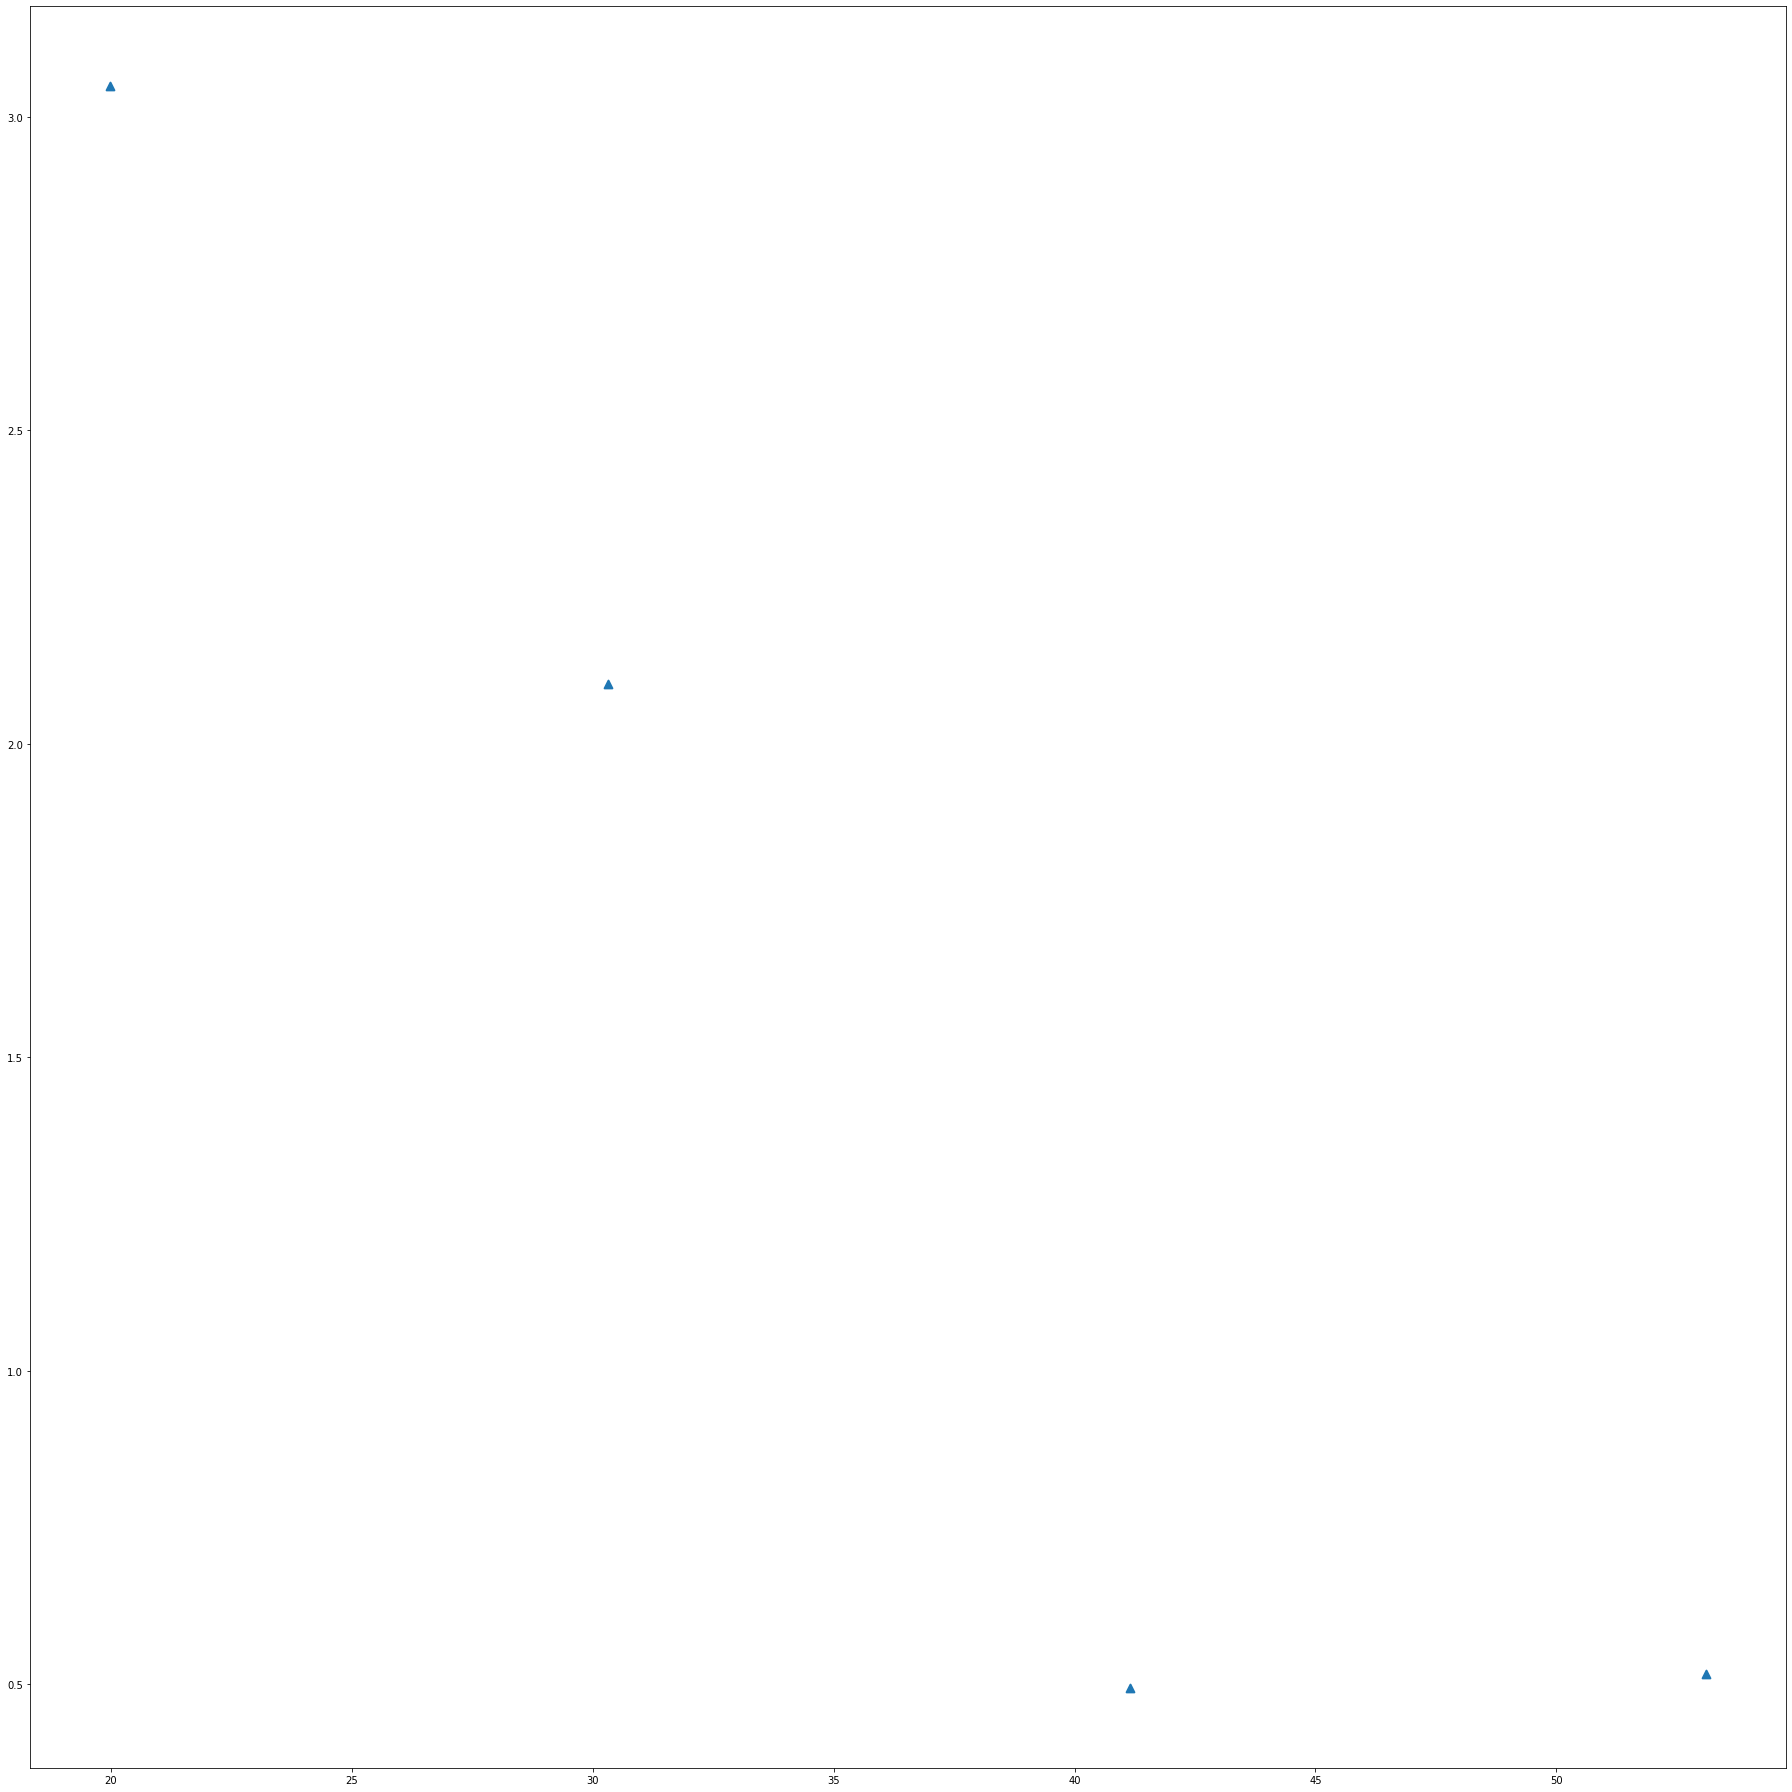

In [32]:
from sklearn import cluster 
from matplotlib import pyplot as plt

#création d'un clusetr Kmean avec nombre de clusters 4

kmeans = cluster.KMeans(n_clusters=4)


#Apprentissage (segmetation) (fonction fit)

kmeans.fit(data2)

#Prédiction et enregistrement des labels 

labelsKM= kmeans.predict(data2)


#enregistrement des centres des clusters

centresKM= kmeans.cluster_centers_

plt.scatter(centresKM[:,0],centresKM[:,1], s=60,marker='^',linewidth=2)


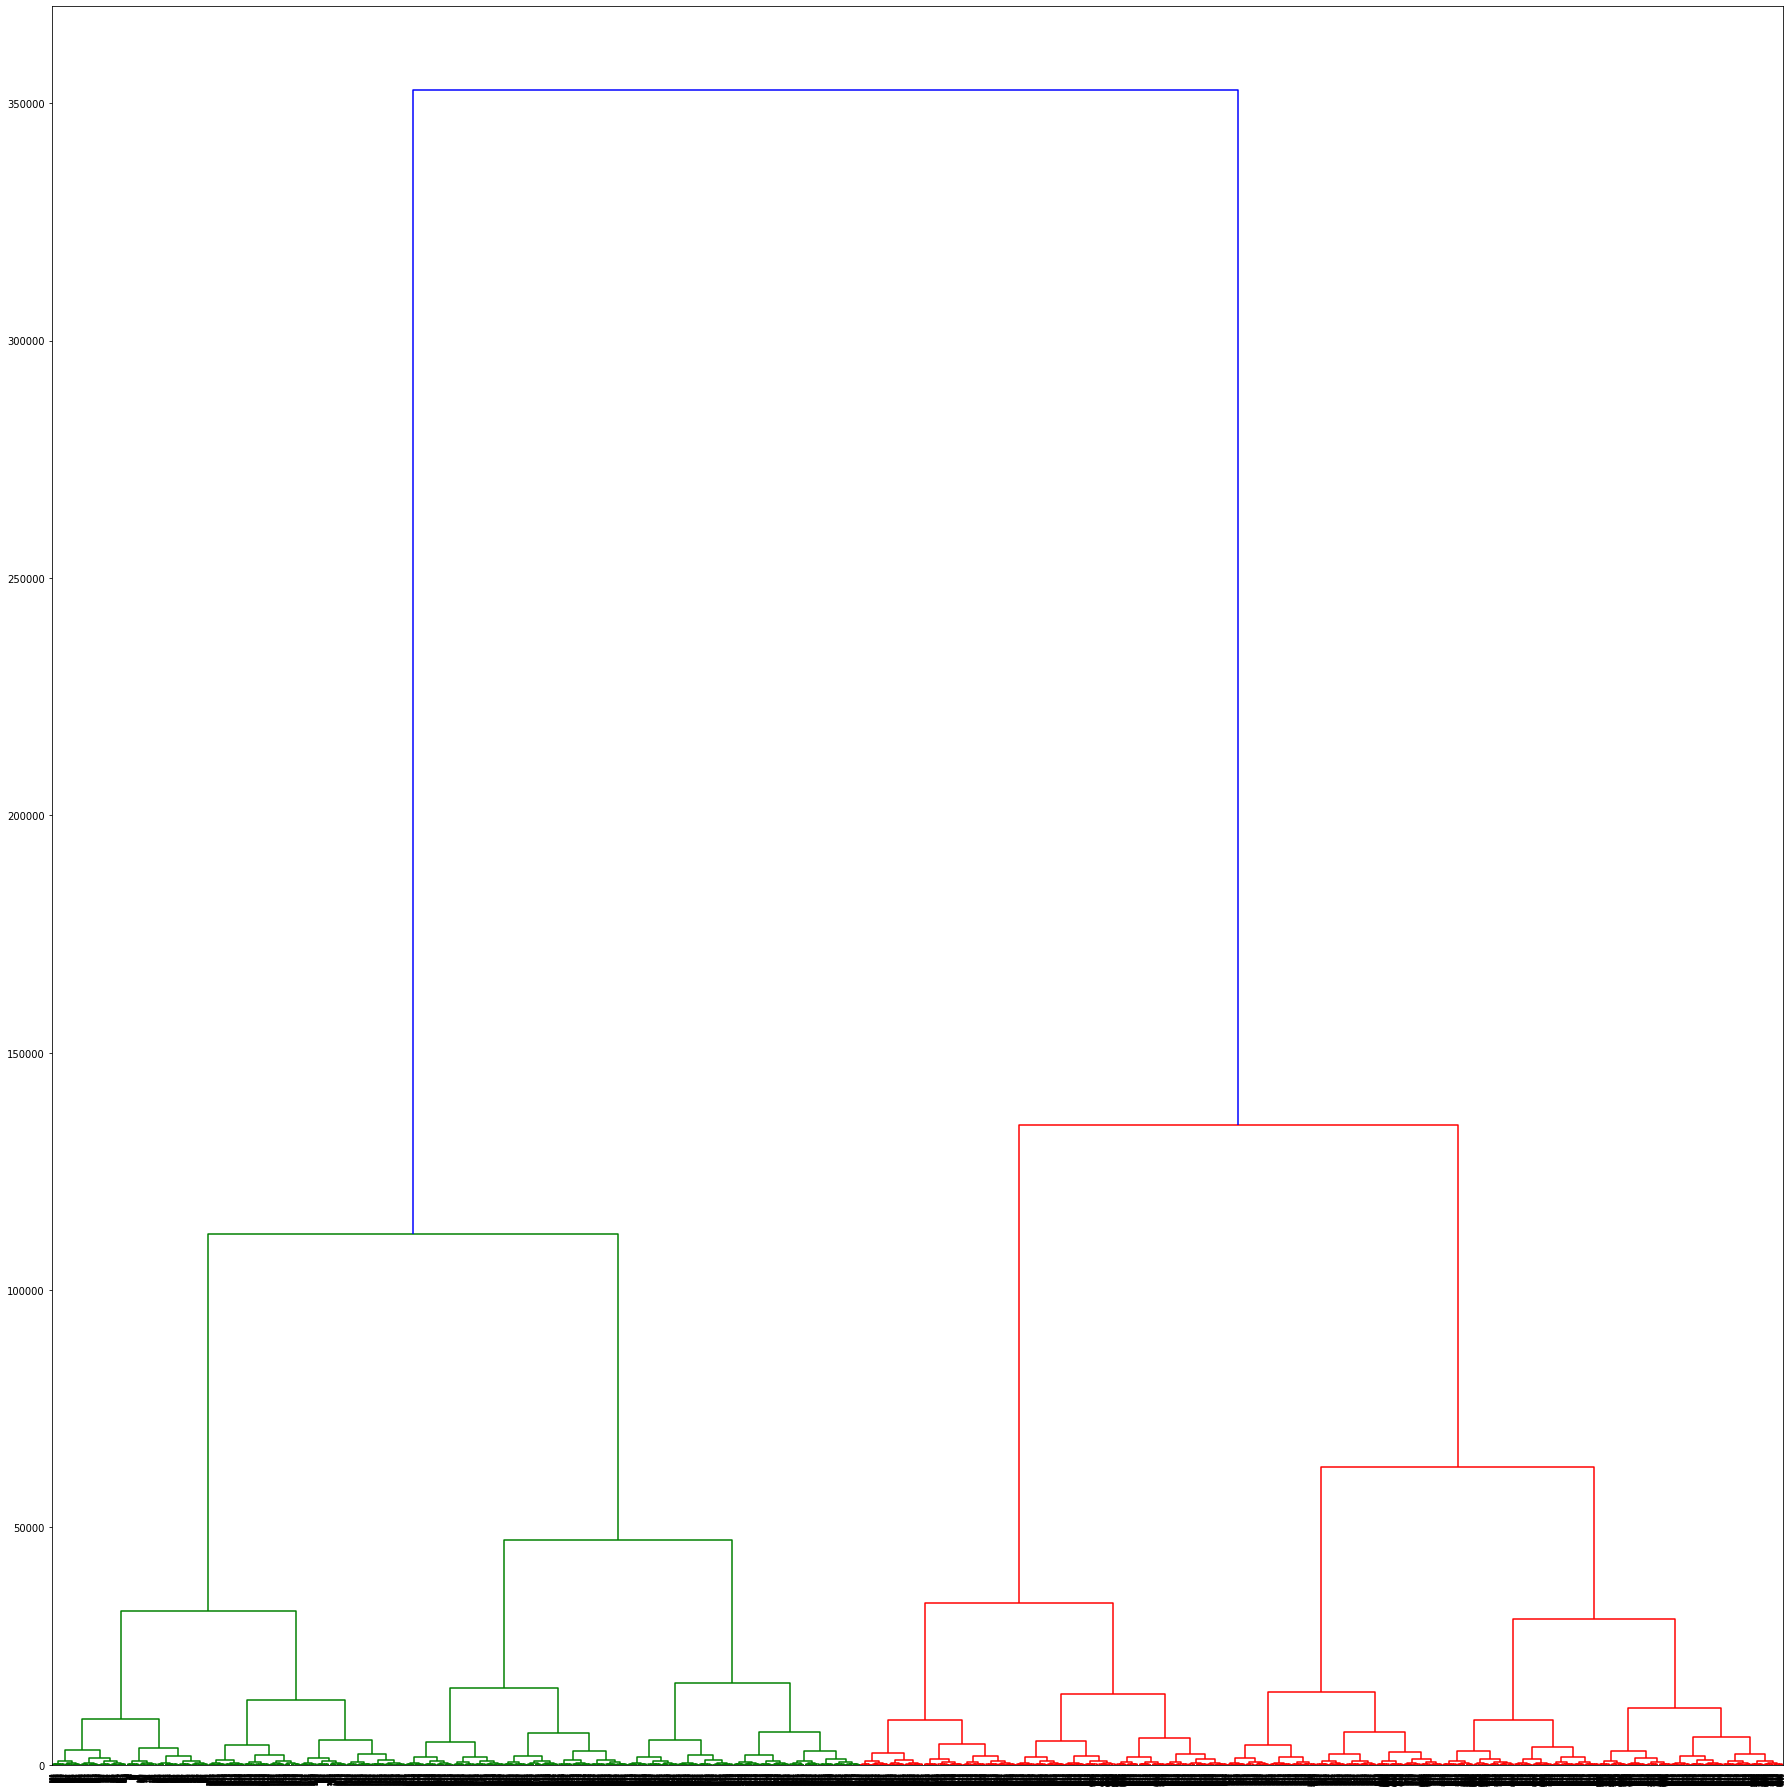

In [10]:
from sklearn.cluster import AgglomerativeClustering
from matplotlib.pyplot import *

#création d'une  CHA

cha = AgglomerativeClustering(n_clusters=10)

#Apprentissage (segmetation)

cha.fit(data2)

#Prédiction et enregistrement des labels (fonction fit_predict)

labelsCHA = cha.fit_predict(data2)


#Affichage du dendrogramme de la méthode hiérarchique

#importer la librarairie scipy.cluster.hierarchy
import scipy.cluster.hierarchy as sch
#générer le dendrogramme des méthodes hiérarchique 

plt.rcParams["figure.figsize"] = [25, 25]
plt.rcParams["figure.autolayout"] = True
a = np.random.multivariate_normal([0, 10], [[3, 1], [1, 4]], size=[2, ])
b = np.random.multivariate_normal([0, 10], [[3, 1], [1, 4]], size=[3, ])
X = np.concatenate((a, b), )
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
dendrogram = sch.dendrogram(sch.linkage(data2, method='ward'),ax=ax)
plt.show()


In [15]:
#librairie pour évaluation des partitions
from sklearn import metrics


#Calcul score des 2 clusters

clt1 = metrics.silhouette_score(data2,labelsKM)
clt2 = metrics.silhouette_score(data2,labelsCHA)

#Affichage de la fonction 

print("Silhouette_score : %f" %clt1)
print("Silhouette_score : %f" %clt2)

#correspondance avec les groupes de kmeans


Silhouette_score : 0.571382
Silhouette_score : 0.515339
